In [1]:
import pandas as pd
import numpy as np


from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NFLX.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [3]:
#df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5044 non-null   object 
 1   Open       5044 non-null   float64
 2   High       5044 non-null   float64
 3   Low        5044 non-null   float64
 4   Close      5044 non-null   float64
 5   Adj Close  5044 non-null   float64
 6   Volume     5044 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 276.0+ KB


In [5]:
df.drop('Adj Close',axis = 1,inplace = True)

In [6]:
#convert object datatype
df['Date']

0       2002-05-23
1       2002-05-24
2       2002-05-28
3       2002-05-29
4       2002-05-30
           ...    
5039    2022-05-27
5040    2022-05-31
5041    2022-06-01
5042    2022-06-02
5043    2022-06-03
Name: Date, Length: 5044, dtype: object

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Date']

0      2002-05-23
1      2002-05-24
2      2002-05-28
3      2002-05-29
4      2002-05-30
          ...    
5039   2022-05-27
5040   2022-05-31
5041   2022-06-01
5042   2022-06-02
5043   2022-06-03
Name: Date, Length: 5044, dtype: datetime64[ns]

In [9]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [10]:
df.head().T

,0,1,2,3,4
Date,2002-05-23 00:00:00,2002-05-24 00:00:00,2002-05-28 00:00:00,2002-05-29 00:00:00,2002-05-30 00:00:00
Open,1.156429,1.214286,1.213571,1.164286,1.107857
High,1.242857,1.225,1.232143,1.164286,1.107857
Low,1.145714,1.197143,1.157143,1.085714,1.071429
Close,1.196429,1.21,1.157143,1.103571,1.071429
Volume,104790000,11104800,6609400,6757800,10154200
year,2002,2002,2002,2002,2002
month,5,5,5,5,5
day,23,24,28,29,30


In [11]:
df.drop('Date',axis = 1,inplace = True)

In [12]:
df

,Open,High,Low,Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,10154200,2002,5,30
...,...,...,...,...,...,...,...,...
5039,193.190002,195.250000,190.369995,195.190002,8586000,2022,5,27
5040,196.179993,199.949997,190.800003,197.440002,11398500,2022,5,31
5041,198.699997,202.740005,191.660004,192.910004,8416200,2022,6,1
5042,192.020004,205.470001,191.720001,205.089996,9623100,2022,6,2


In [13]:
df.shape

(5044, 8)

In [14]:
#checking null count
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
year      0
month     0
day       0
dtype: int64

In [15]:
# checking duplicates
df.duplicated().sum()

0

In [16]:
#finally checking dtype
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
year        int32
month       int32
day         int32
dtype: object

In [17]:
df.describe()

,Open,High,Low,Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


#### EDA

In [18]:
#checking corr
df.corr()

,Open,High,Low,Close,Volume,year,month,day
Open,1.000000,0.999863,0.999853,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,1.000000,-0.108797,-0.044664,0.032562
year,0.814140,0.814615,0.813706,0.814257,-0.108797,1.000000,-0.072108,-0.006204
month,-0.004033,-0.004482,-0.003523,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
day,-0.003739,-0.003833,-0.003572,-0.003773,0.032562,-0.006204,-0.001500,1.000000


<Axes: >

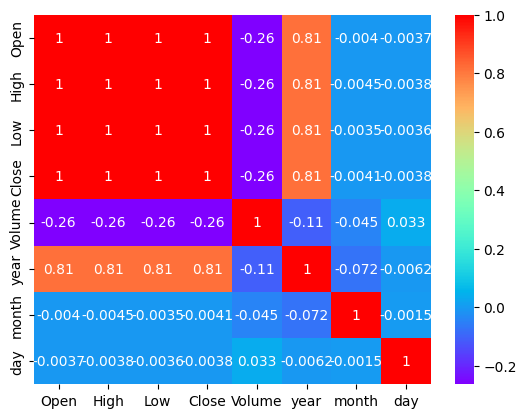

In [19]:
sns.heatmap(df.corr(),annot = True,cmap = 'rainbow')

<Axes: xlabel='Open', ylabel='Close'>

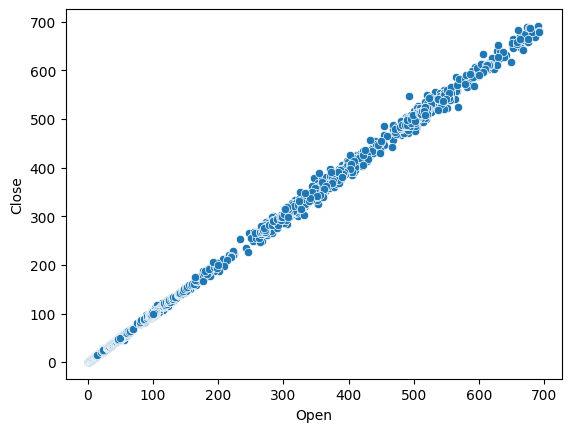

In [20]:
sns.scatterplot(x = df['Open'],y = df['Close'])

In [21]:
#strong linerar realiton betn open and close col

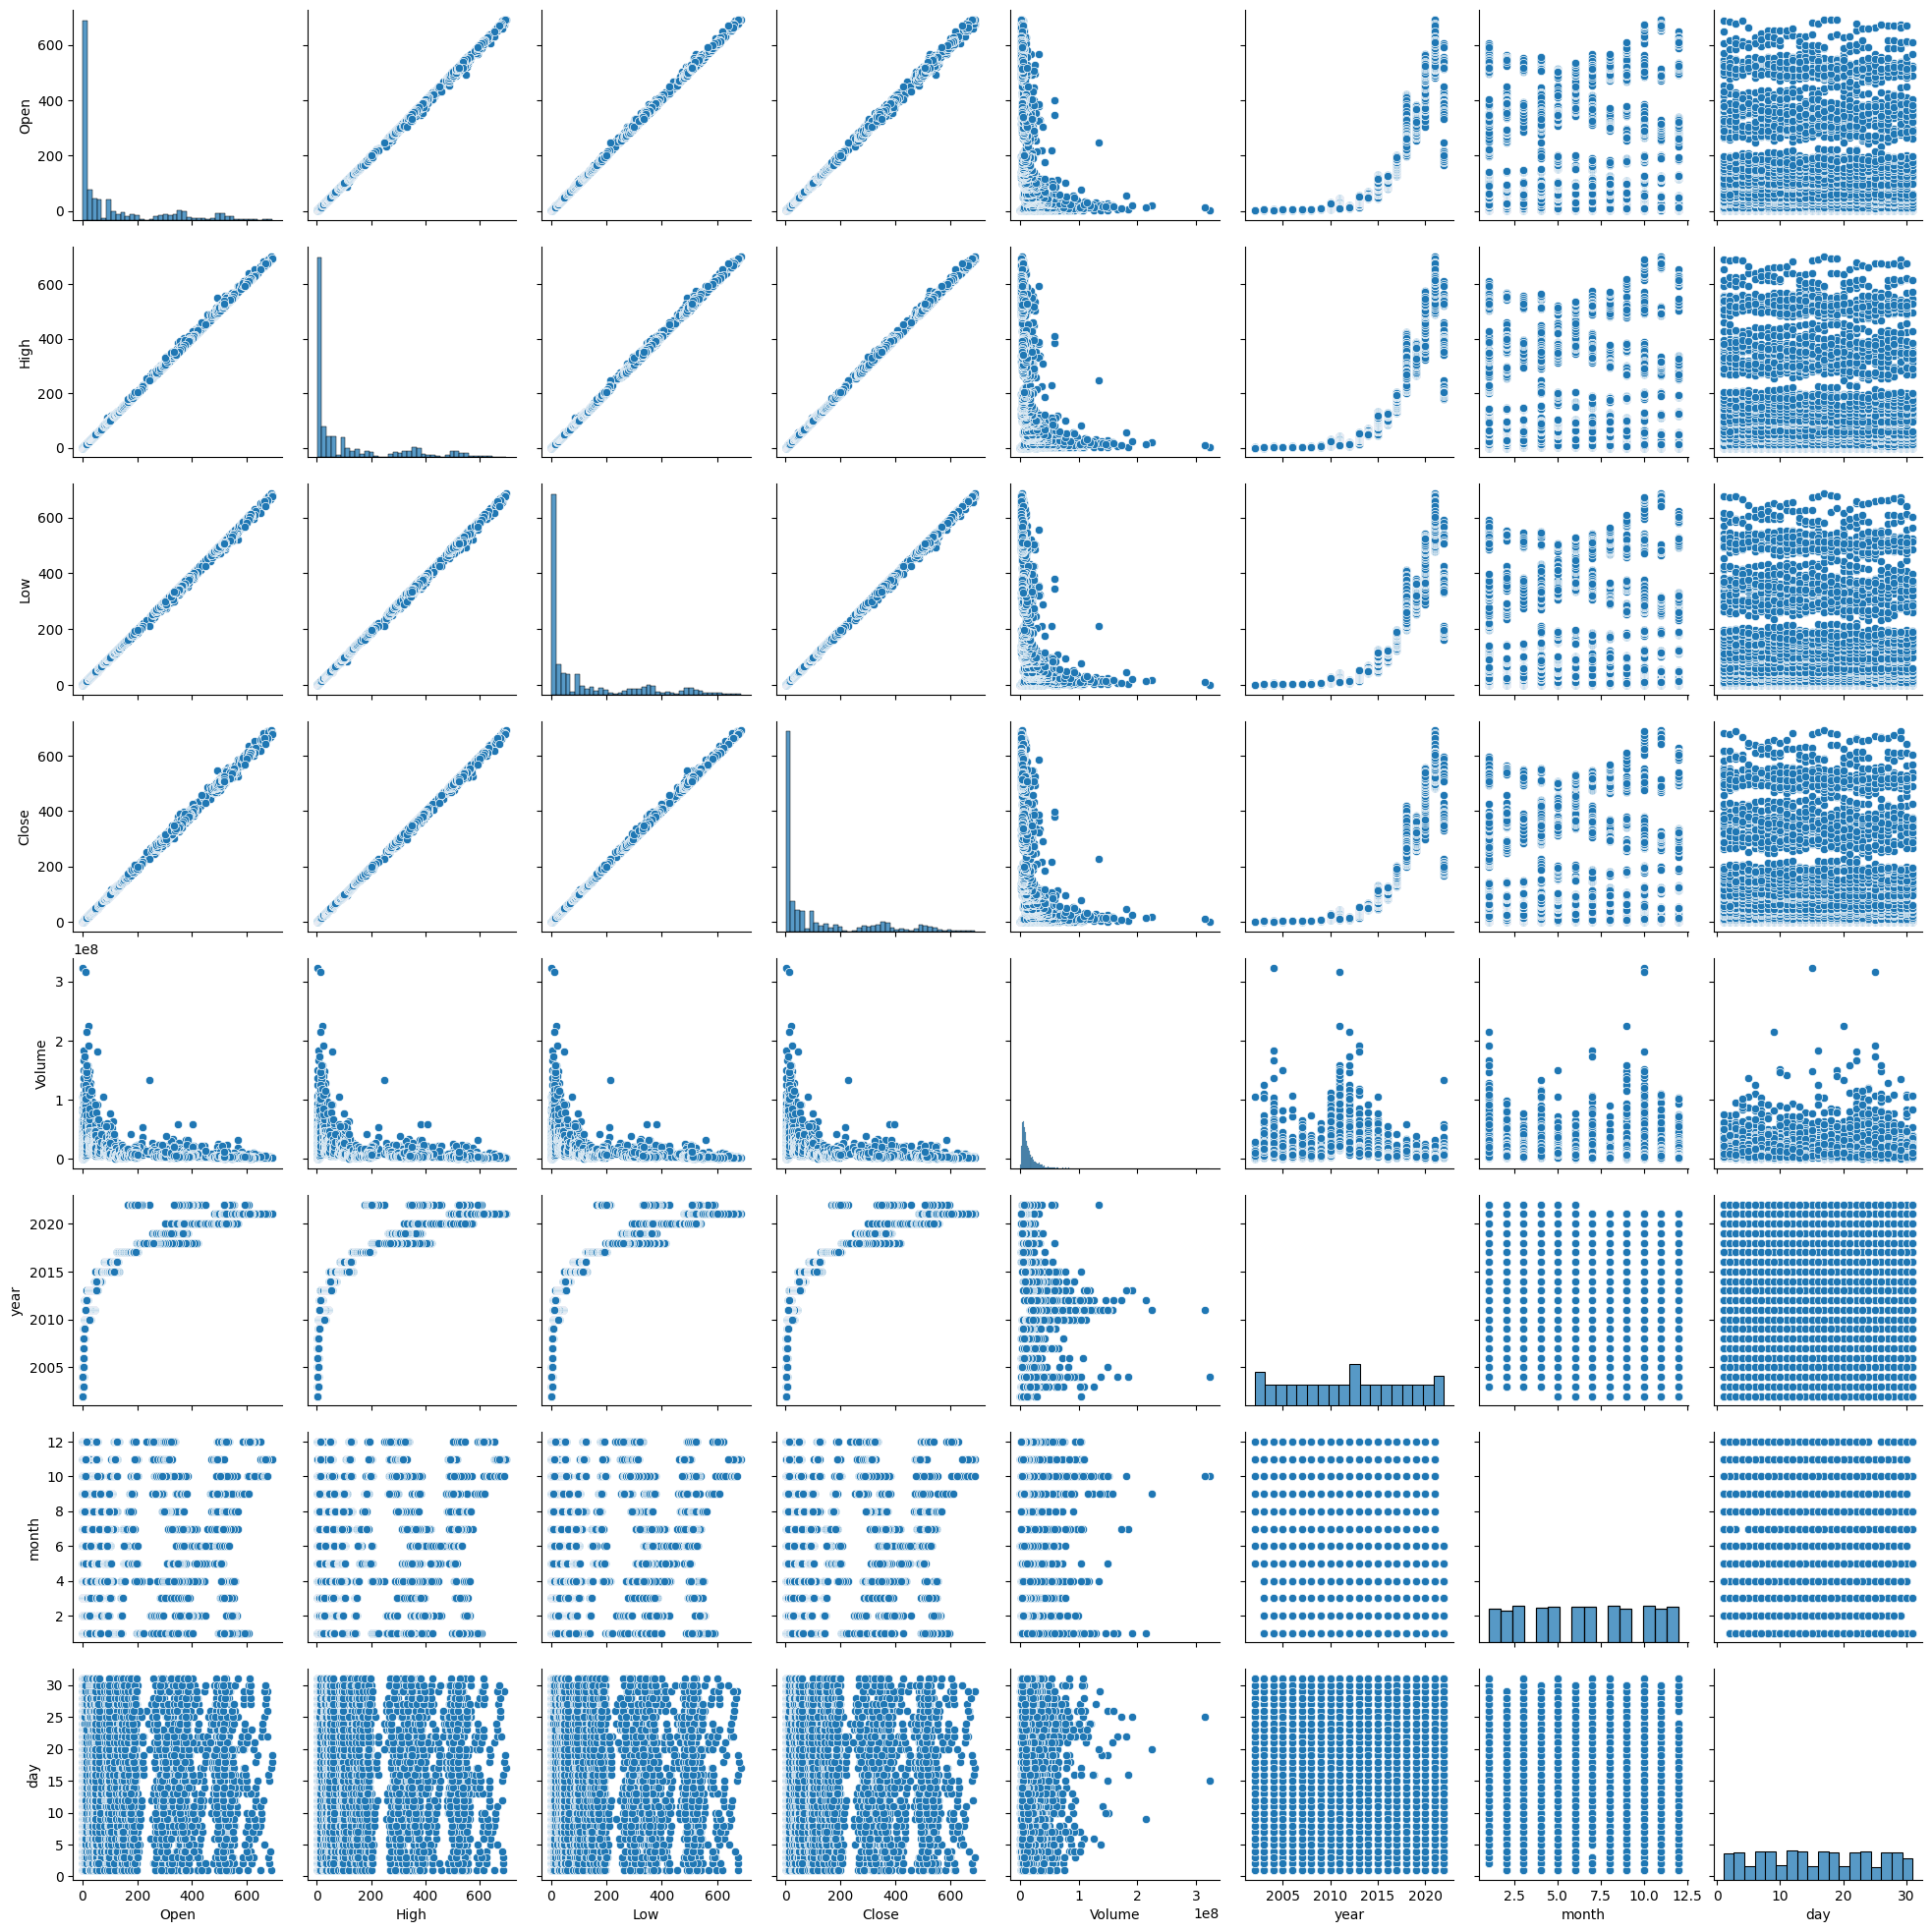

In [22]:
sns.pairplot(df)

<Axes: xlabel='Open', ylabel='Density'>

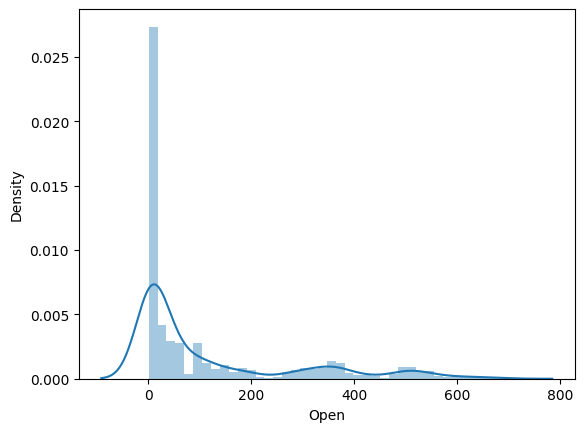

In [23]:
sns.distplot(df['Open'])

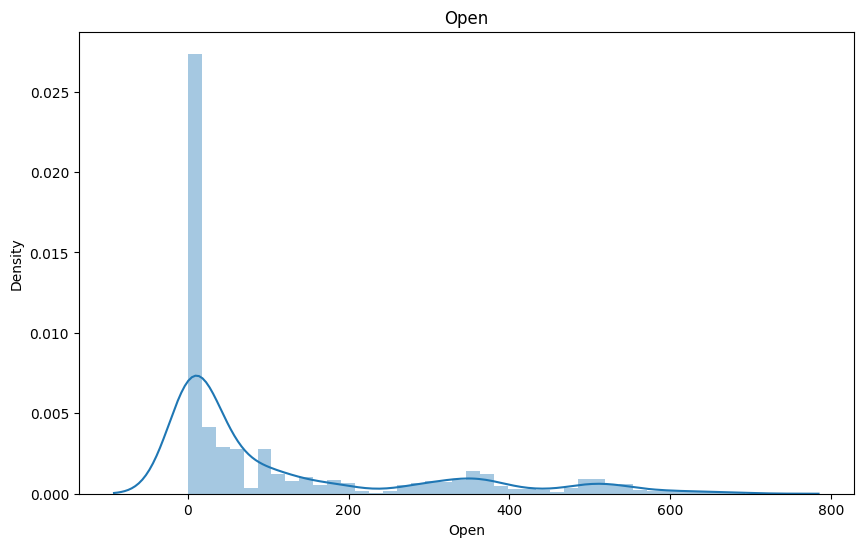

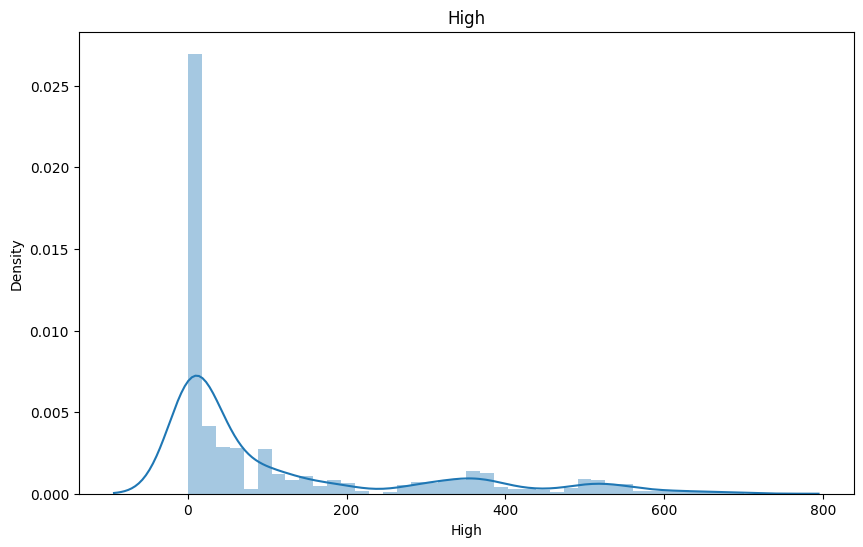

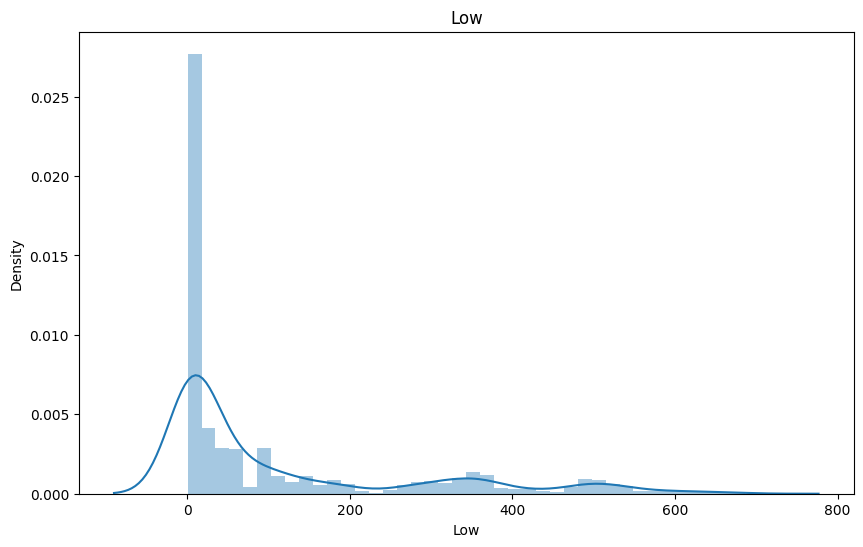

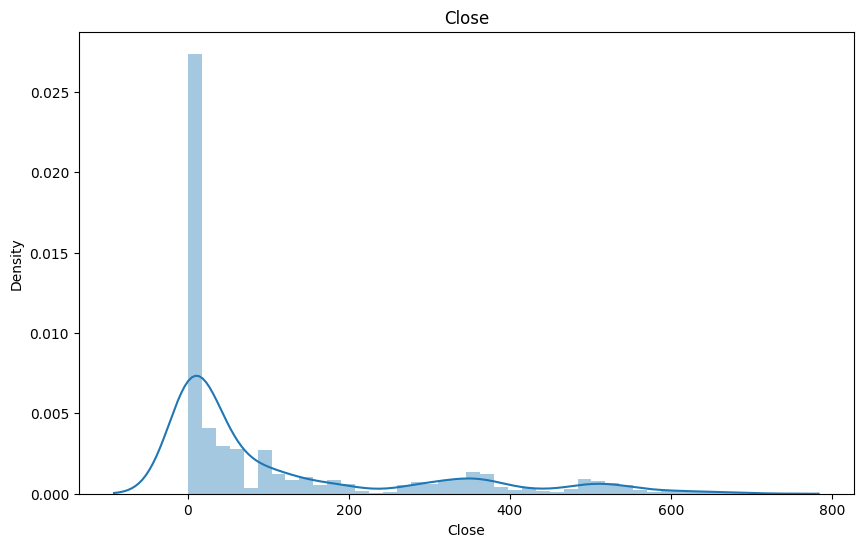

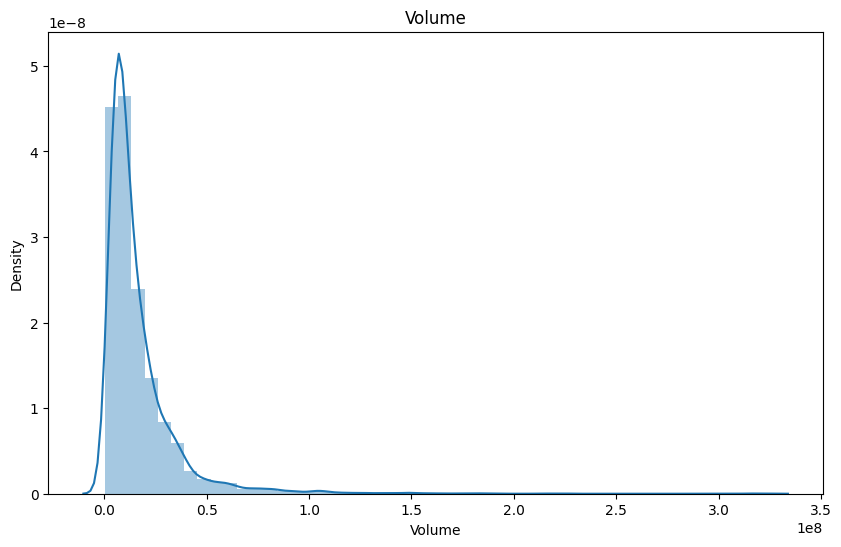

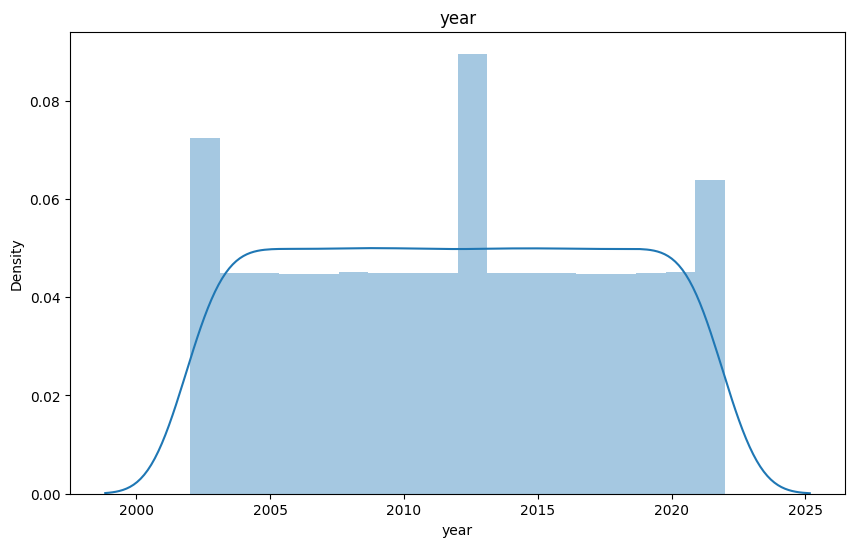

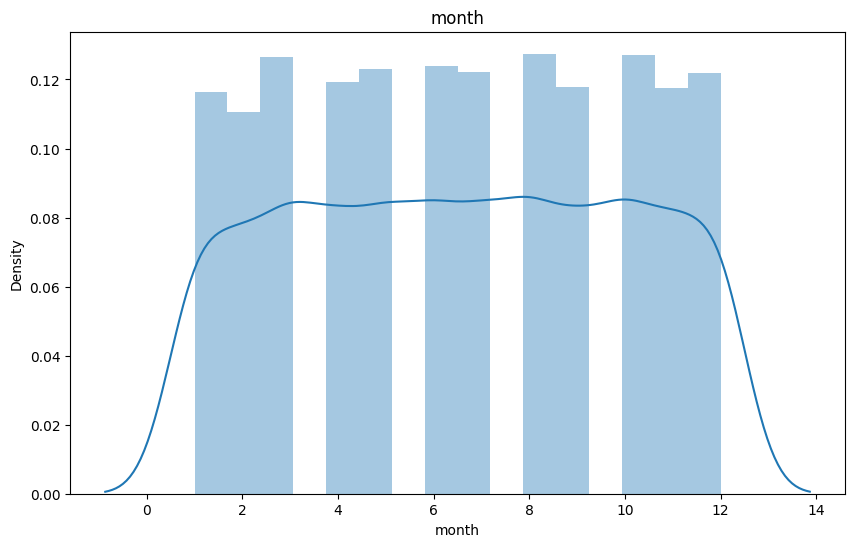

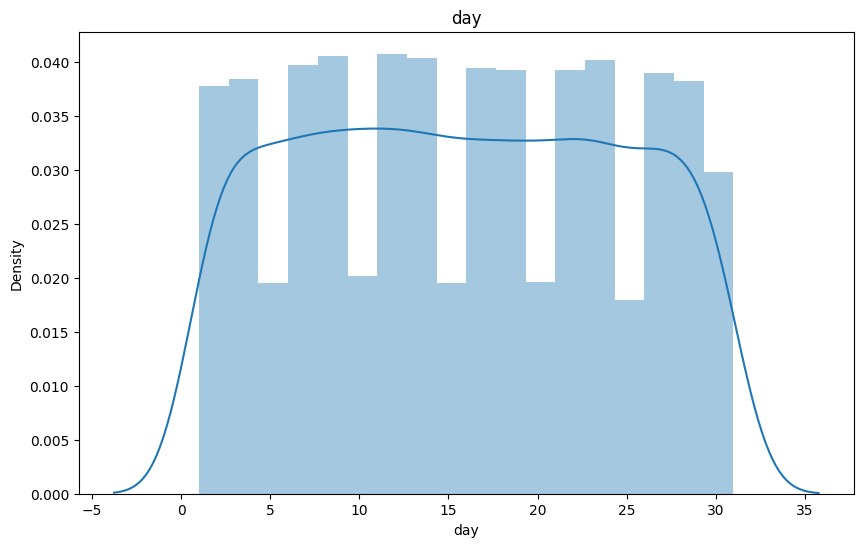

In [24]:
# checking for each column

for i in df.columns:
    plt.figure(figsize = (10,6))
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='Open', ylabel='Close'>

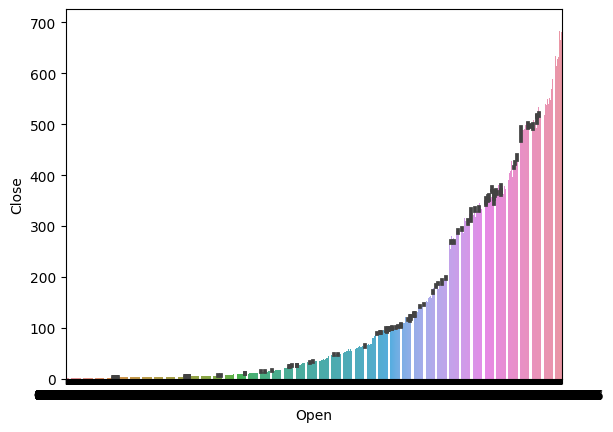

In [25]:
sns.barplot(x=df['Open'],y=df['Close'])

In [26]:
x = df.drop('Close', axis = 1)
y = df['Close']

#### Train-Test-Split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 11)

In [28]:
x_train.shape

(4035, 7)

In [29]:
x_test.shape

(1009, 7)

In [30]:
x.columns

Index(['Open', 'High', 'Low', 'Volume', 'year', 'month', 'day'], dtype='object')

#### Model Training

#### Instantiating Linear Regression Model

In [31]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train) 
# Training of Lienar Regression Model

LinearRegression()

#### Model Evaluation

In [32]:
y_pred = linear_reg.predict(x_test)
y_pred.size

1009

In [33]:
x_test.size

7063

In [34]:
y_test.size

1009

In [35]:
# Testing Data Evaluation
y_pred = linear_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_test, y_pred)
print("R-Squared Value         :",r2_value)

n = x_test.shape[0]
k = x_test.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 4.614497673443351
Root Mean Squared Error : 2.1481381876972794
Mean Absolute Error     : 0.8958641421300013
R-Squared Value         : 0.9998537785633436
Adjusted R-Squared Value: 0.9998527560358145


In [36]:
# Training Data Evaluation
y_pred_train = linear_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error      :", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error     :",mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-Squared Value         :",r2_value)

n = x_train.shape[0]
k = x_train.shape[1]
adj_r2 = 1 - ((1 - r2_value) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",adj_r2)

Mean Squared Error      : 3.158658181226401
Root Mean Squared Error : 1.7772614273725744
Mean Absolute Error     : 0.7884550380186689
R-Squared Value         : 0.9998857474510248
Adjusted R-Squared Value: 0.9998855488496236


In [37]:
residual = y_train - y_pred_train # Yact - Ypred
residual

3378   -1.298759
3468    1.462967
15      0.006816
5037    0.632833
967     0.048443
          ...   
332     0.014493
1293   -0.038627
4023   -0.064149
3775   -0.214546
1945    0.044676
Name: Close, Length: 4035, dtype: float64

<Axes: xlabel='Close', ylabel='Density'>

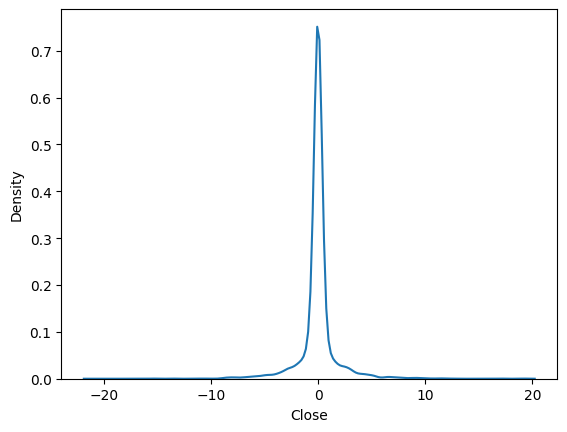

In [38]:
sns.kdeplot(residual)

<Axes: xlabel='Close', ylabel='Count'>

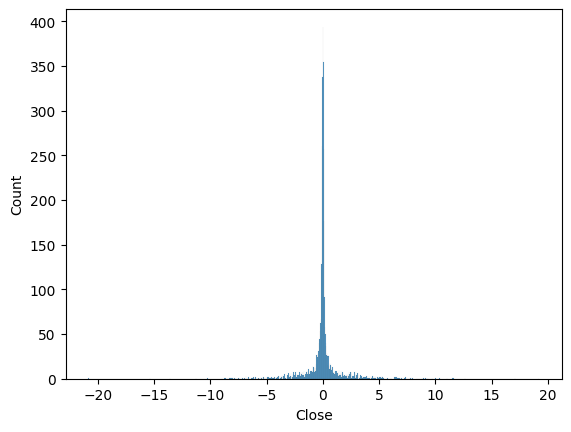

In [39]:
sns.histplot(residual)

In [40]:
import statsmodels.api as sm

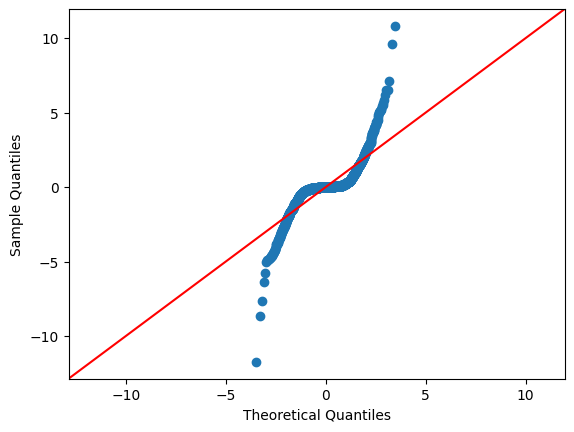

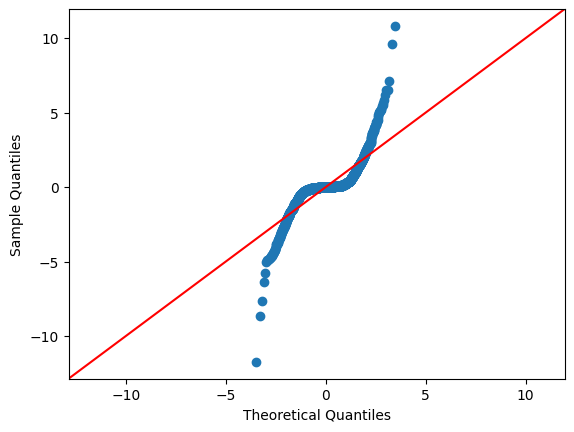

In [41]:
sm.qqplot(residual, line='45', fit = True)

#### Hypothesis Testing

###### shapiro

In [42]:
from scipy.stats import shapiro

In [43]:
stats, p_val = shapiro(residual)
print(stats)
print(p_val)

0.66136634349823
0.0


In [44]:
_, p_val = shapiro(residual)
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 0.0
Data is not normally distributed
Alternate Hypothesis is True


###### ks Test

In [45]:
from scipy.stats import kstest

In [46]:
_, p_val = kstest(residual,'norm')
print("P Value is :", p_val)

if p_val >= 0.05:
    print("Data is normally distributed")
    print("NULL Hypothesis is True")
    
else:
    print("Data is not normally distributed")
    print("Alternate Hypothesis is True")

P Value is : 5.890546379135529e-163
Data is not normally distributed
Alternate Hypothesis is True


###### skewness

In [47]:
from scipy.stats import skew

Mean     : 116.45633812133227
Median   : 25.802856499999997
Skewness : 1.5096735752143147
Skewness : 1.5092245868218033


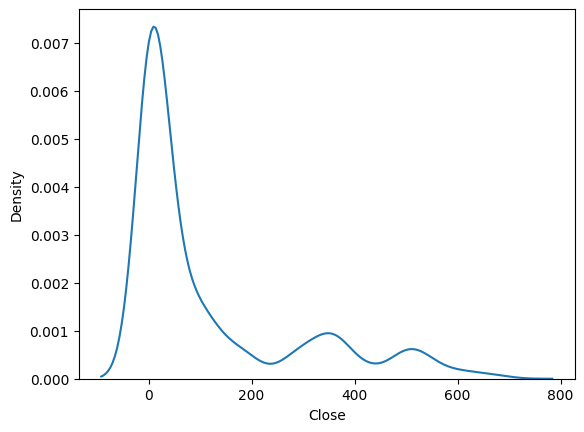

In [48]:
sns.kdeplot(df['Close'])
s1 = df['Close']
print('Mean     :',s1.mean())
print('Median   :',s1.median())
print('Skewness :',s1.skew())
print('Skewness :',skew(s1))

###### Homoscedascticity

In [49]:
y_pred_train
residual_train = y_train - y_pred_train
residual_train

3378   -1.298759
3468    1.462967
15      0.006816
5037    0.632833
967     0.048443
          ...   
332     0.014493
1293   -0.038627
4023   -0.064149
3775   -0.214546
1945    0.044676
Name: Close, Length: 4035, dtype: float64

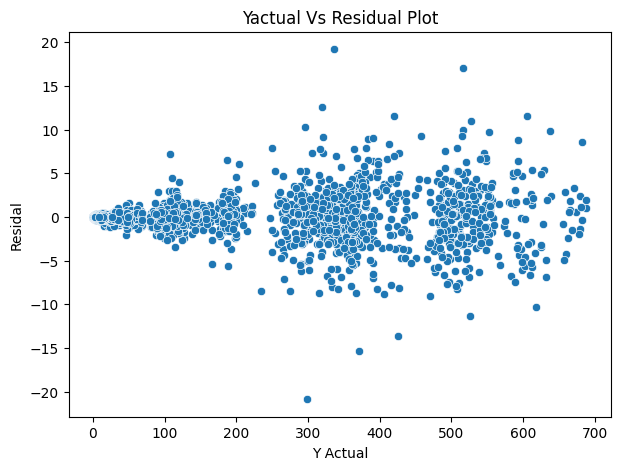

In [50]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual_train)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual Plot")
plt.savefig('Homoscedasticity.png')

###### Single Row Testing

In [51]:
x_test[10:11]

,Open,High,Low,Volume,year,month,day
4978,388.929993,389.220001,375.209991,5356800,2022,3,2


In [52]:
linear_reg.predict(x_test[10:11])[0]

378.49640037911956

In [53]:
column_names = x.columns.tolist()
column_names

['Open', 'High', 'Low', 'Volume', 'year', 'month', 'day']

In [54]:
linear_reg.n_features_in_

7

In [55]:
x.head(1).T

,0
Open,1.156429e+00
High,1.242857e+00
Low,1.145714e+00
Volume,1.047900e+08
year,2.002000e+03
month,5.000000e+00
day,2.300000e+01


In [57]:
Open = 1.156429e+00
High = 1.242857e+00
Low = 1.145714e+00
Volume = 1.047900e+08
year = 2.002000e+03
month = 5.000000e+00
day = 2.300000e+01

test_array = np.zeros([1,linear_reg.n_features_in_])
test_array[0,0] = Open
test_array[0,1] = High
test_array[0,2] = Low
test_array[0,3] = Volume
test_array[0,4] = year
test_array[0,5] = month
test_array[0,6] = day

predicted_close = np.around(linear_reg.predict(test_array)[0],3)

In [59]:
import pickle

In [61]:
with open ('linear_regression.pkl','wb')as f:
    pickle.dump(linear_reg,f)